<a href="https://colab.research.google.com/github/louzeiro/USP2023Sem01/blob/main/Aprendizado_Supervisionado_Arvore_de_decis%C3%A3o_JogarTenis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0829 Aprendizado de Máquina


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Exemplo Árvore de decisão



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import random

random.seed(1)

# Carregando os dados
dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado_de_Maquina/main/Dados/JogarTenis.csv')
dados.head(14)


,Tempo,Temperatura,Umidade,Vento,Joga
0,Chuvoso,22,91,Sim,Não
1,Ensolarado,21,70,Não,Sim
2,Ensolarado,27,90,Sim,Não
3,Nublado,28,86,Não,Sim
4,Chuvoso,21,96,Não,Sim
5,Chuvoso,18,70,Sim,Não
6,Nublado,18,65,Sim,Sim
7,Nublado,22,90,Sim,Sim
8,Ensolarado,24,70,Sim,Sim
9,Chuvoso,20,80,Não,Sim


In [ ]:
-9/14*np.log2(9/14)-5/14*np.log2(5/14)

0.9402859586706311

In [ ]:
#dados['Tempo'] = dados['Tempo'].astype('category')

In [9]:
# Converte as colunas categóricas em números
converte = {'Ensolarado': 1, 'Nublado': 2, 'Chuvoso': 3, 'Sim': 1, 'Não': 0}
dados = dados.applymap(lambda s: converte.get(s) if s in converte else s)
dados

,Tempo,Temperatura,Umidade,Vento,Joga
0,3,22,91,1,0
1,1,21,70,0,1
2,1,27,90,1,0
3,2,28,86,0,1
4,3,21,96,0,1
5,3,18,70,1,0
6,2,18,65,1,1
7,2,22,90,1,1
8,1,24,70,1,1
9,3,20,80,0,1


In [10]:
# Separa as preditoras (X) e a resposta (y)
X = dados.drop('Joga', axis=1)
y = dados['Joga']

In [34]:
# dados de treinamento e teste: 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Cria uma árvore de decisão
arvore = DecisionTreeClassifier(max_depth=5, 
                                #criterion='entropy'
                                )

# Treina a árvore de decisão usando os dados de treinamento
arvore.fit(X_train, y_train)

# Usa a árvore de decisão para prever os rótulos da base de teste
y_pred = arvore.predict(X_test)
y_pred

array([1, 1, 1])

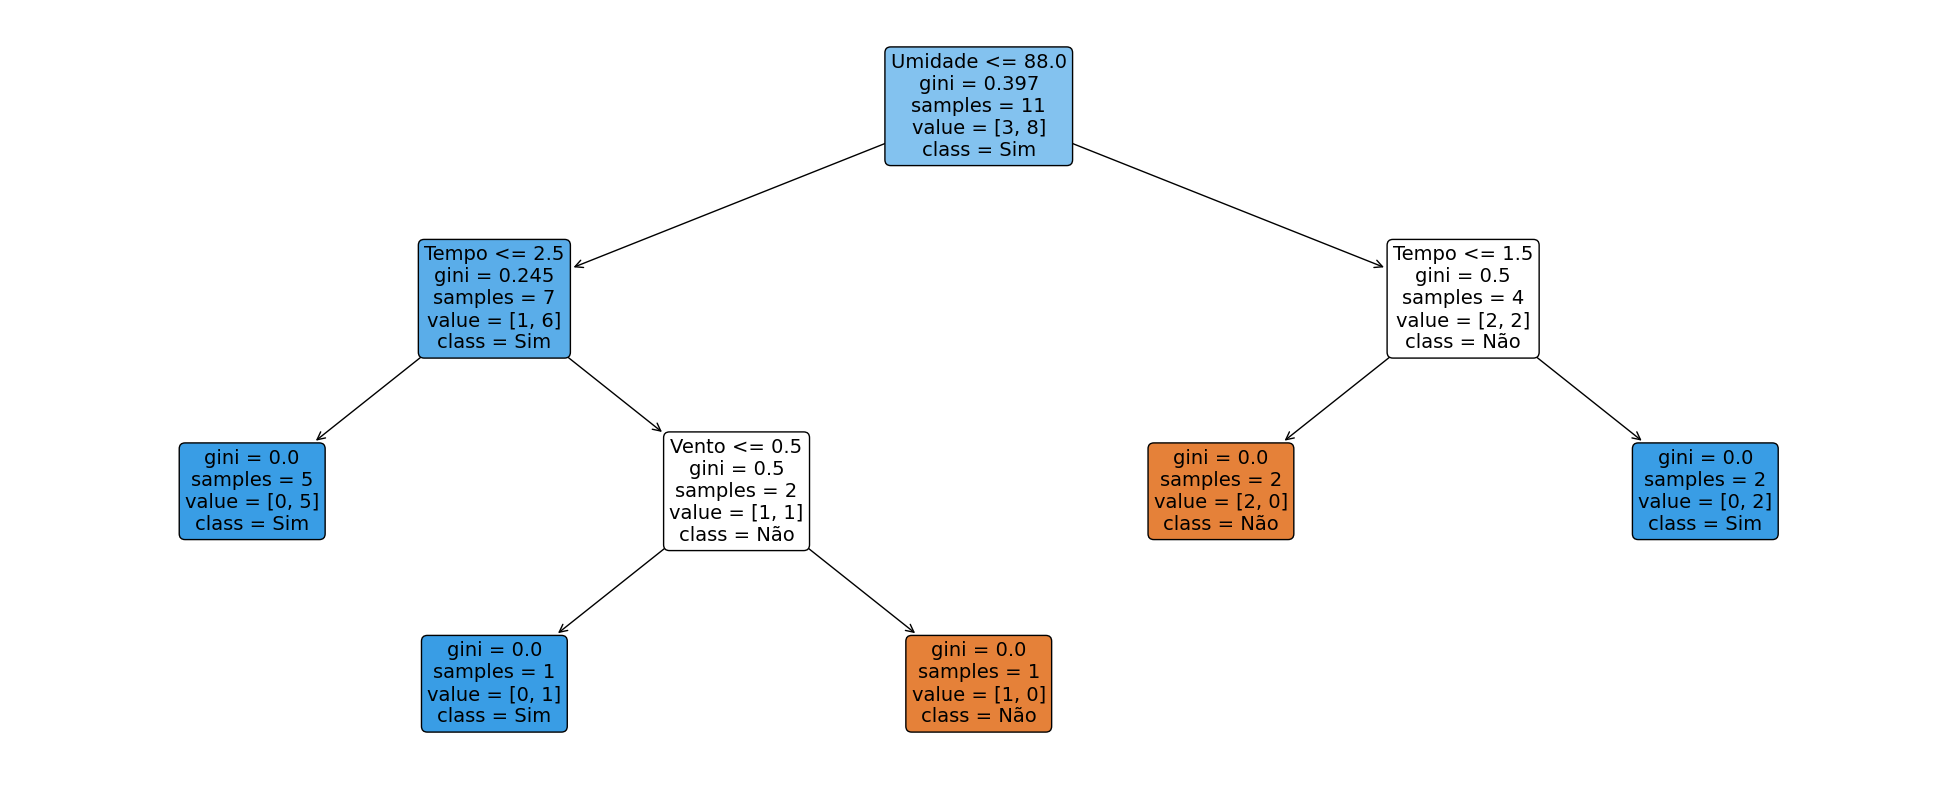

In [38]:
plt.figure(figsize=(25,10))
a = plot_tree(arvore, 
              feature_names=['Tempo', 'Temperatura', 'Umidade', 'Vento'],
              class_names=['Não', 'Sim'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

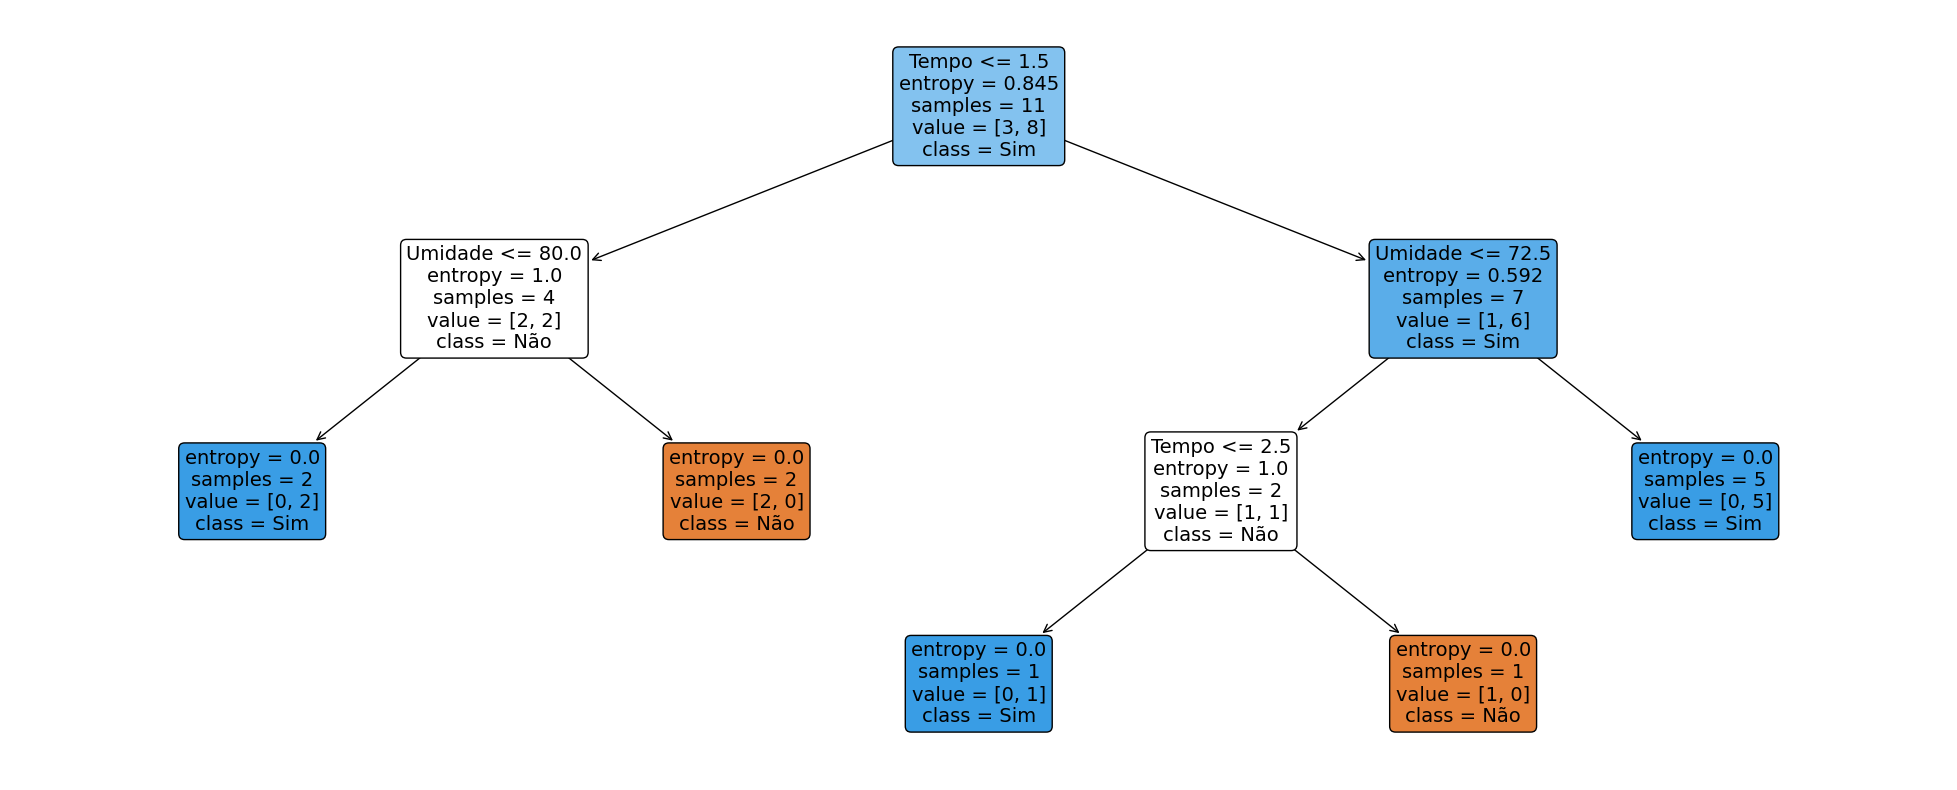

In [27]:
plt.figure(figsize=(25,10))
a = plot_tree(arvore, 
              feature_names=['Tempo', 'Temperatura', 'Umidade', 'Vento'],
              class_names=['Não', 'Sim'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Acurácia
acc = accuracy_score(y_test, y_pred)

print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(acc,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.667

Precisão (para a classe 1): 0.5
Recall (para a classe 1): 1.0
F1-score (para a classe 1): 0.667

Precisão (para a classe 0): 1.0
Recall (para a classe 0): 0.5
F1-score (para a classe 0): 0.667


In [ ]:
from sklearn.model_selection import GridSearchCV

# Uso da validação cruzada para encontar a melhor árvore
param_grid = {
    'max_depth': range(1, 4),
    'min_samples_split': range(2, 5),
    'min_samples_leaf': range(1, 14)
}

# Realiza a busca em grid com cross-validation para encontrar a melhor árvore
grid = GridSearchCV(arvore, param_grid, cv=3)
grid.fit(X_train, y_train)

# Usa a árvore de decisão para prever os rótulos da base de teste
y_pred = grid.predict(X_test)

# Melhor árvore escolhida
print(f"Melhores parâmetros: {grid.best_params_}")
print(f"Acurácia da melhor árvore: {grid.best_score_}")

Melhores parâmetros: {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 2}
Acurácia da melhor árvore: 0.7222222222222222


In [ ]:
# Acurácia
acc = accuracy_score(y_test, y_pred)

print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(acc,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.667

Precisão (para a classe 1): 0.5
Recall (para a classe 1): 1.0
F1-score (para a classe 1): 0.667

Precisão (para a classe 0): 1.0
Recall (para a classe 0): 0.5
F1-score (para a classe 0): 0.667


# Exemplo Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Inicializa o classificador por árvore de decisão
tree = DecisionTreeClassifier()

# Inicializa o classificador por Bagging 
bagging = BaggingClassifier(base_estimator=tree, n_estimators=10, random_state=42)

# Ajusta o classificador por Bagging aos dados de treinamento
bagging.fit(X_train, y_train)

# Avalia a performance do classificador por Bagging nos dados de teste 
score = bagging.score(X_test, y_test)

# Prediz a resposta para a base de teste
y_pred = bagging.predict(X_test)

# Avalia a performance do classificador por Bagging nos dados de teste 
score = bagging.score(X_test, y_test)



print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(score,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.333

Precisão (para a classe 1): 0.333
Recall (para a classe 1): 1.0
F1-score (para a classe 1): 0.5

Precisão (para a classe 0): 0.0
Recall (para a classe 0): 0.0
F1-score (para a classe 0): 0.0


/home/cibele/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exemplo Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Inicializa o classificador por árvore de decisão
tree = DecisionTreeClassifier(max_depth=3)

# Inicializa o classificador AdaBoost
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=50, learning_rate=1, random_state=42)

# Ajusta o classificador AdaBoost aos dados de treinamento
adaboost.fit(X_train, y_train)

# Avalia a performance do classificador AdaBoost nos dados de teste 
score = adaboost.score(X_test, y_test)

# Prediz para a base de teste
y_pred = adaboost.predict(X_test)

# Avalia a performance do classificador AdaBoost nos dados de teste 
score = adaboost.score(X_test, y_test)



print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(score,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.667

Precisão (para a classe 1): 0.5
Recall (para a classe 1): 1.0
F1-score (para a classe 1): 0.667

Precisão (para a classe 0): 1.0
Recall (para a classe 0): 0.5
F1-score (para a classe 0): 0.667


# Exemplo Florestas aleatórias


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Ajusta um classificador por florestas aleatórias
clf = RandomForestClassifier(n_estimators=200, random_state=10)
clf.fit(X_train, y_train)

# Obtém predições para a base de teste
y_pred = clf.predict(X_test)

# Avalia a performance do classificador por florestas aleatórias nos dados de teste 
acc = accuracy_score(y_test, y_pred)



print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(acc,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.333

Precisão (para a classe 1): 0.333
Recall (para a classe 1): 1.0
F1-score (para a classe 1): 0.5

Precisão (para a classe 0): 0.0
Recall (para a classe 0): 0.0
F1-score (para a classe 0): 0.0


/home/cibele/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
